7. [**Doğrusal Olmayan Regresyon Modelleri**](#7.-Doğrusal-Olmayan-Regresyon-Modelleri)
    * [a. K-En Yakın Komşu (KNN)](#a.-K-En-Yakın-Komşu-(KNN))
        * [KNN - Model Oluşturma](#KNN---Model-Oluşturma)
        * [KNN - Model Tuning](#KNN---Model-Tuning)
        * [Ara not : Hatada Validasyonun Önemi](#Ara-not-:-Hatada-Validasyonun-Önemi)
        
    * [b. Destek Vektör Regresyonu (SVR)](#b.-Destek-Vektör-Regresyonu-(SVR))
        * [i. Linear SVR](#i.-Linear-SVR)
            * [LSVR - Model Oluşturma](#LSVR---Model-Oluşturma)
            * [LSVR - Model Tuning](#LSVR---Model-Tuning)
        * [ii. Non-Linear SVR](#ii.-Non-Linear-SVR)
            * [NLSVR - Model Tuning](#NLSVR---Model-Tuning)
            
    * [c. Yapay Sinir Ağları (ANN - Artificial Neural Network)](#c.-Yapay-Sinir-Ağları-(ANN---Artificial-Neural-Network))
        * [ANN - Model Oluşturma](#ANN---Model-Oluşturma)
        * [ANN - Model Tuning](#ANN---Model-Tuning)
        
    * [d. Classification And Regression Trees (CART)](#d.-Classification-And-Regression-Trees-(CART))
        * [CART - Model Oluşturma](#CART---Model-Oluşturma)
        * [CART - Model Tuning](#CART---Model-Tuning)
    * [e. Bagged Trees (Bootstrap Aggregation)](#e.-Bagged-Trees-(Bootstrap-Aggregation))
        * [BT - Model Oluşturma](#BT---Model-Oluşturma)
        * [BT - Model Tuning](#BT---Model-Tuning)
    * [f. Random Forest](#f.-Random-Forest)
        * [RF - Model Oluşturma](#RF---Model-Oluşturma)
        * [RF - Model Tuning](#RF---Model-Tuning)
    * [g. Gradient Boosting Machines (GBM)](#g.-Gradient-Boosting-Machines-(GBM))
        * [GBM - Model Oluşturma](#GBM---Model-Oluşturma)
        * [GBM - Model Tuning](#GBM---Model-Tuning)
    * [h. eXtreme Gradient Boosting (XGBoost)](#h.-eXtreme-Gradient-Boosting-(XGBoost))
        * [XGBoost - Model Oluşturma](#XGBoost---Model-Oluşturma)
        * [XGBoost - Model Tuning](#XGBoost---Model-Tuning)
    * [i. LightGBM](#i.-LightGBM)
        * [LightGBM - Model Oluşturma](#LightGBM---Model-Oluşturma)
        * [LightGBM - Model Tuning](#LightGBM---Model-Tuning)
    * [j. Category Boosting (CatBoost)](#j.-Category-Boosting-(CatBoost))
        * [CatBoost - Model Oluşturma](#CatBoost---Model-Oluşturma)
        * [CatBoost - Model Tuning](#CatBoost---Model-Tuning)

# **7. Doğrusal Olmayan Regresyon Modelleri**

Bu başlık altında;
* K-En Yakın Komşu (KNN)
* Destek Vektör Regresyonu (SVR)
* Çok Katmanlı Algılayıcılar (ANN)
* Classification and Regression Trees (CART)
* Bagging (Bootstrap Aggregation)
* Random Forests (RF)
* Gradient Boosting Machines (GBM)
* Extreme Gradient Boosting (XGBoost)
* LightGBM
* CatBoost
modellerini inceleyeceğiz.<br><br>Ayrıca her bir model için
* Model kurmayı
* Kurduğumuz model ile tahmin yapmayı
* Kurduğumuz modelin optimizasyonunu gerçekleştireceğiz.

## **a. K-En Yakın Komşu (KNN)**

Tahminler gözlem benzerliğine göre yapılır. -Bana arkadaşını söyle sana kim olduğunu söyleyeyim.- Parametrik olmayan bir öğrenme türüdür. Büyük verisetleri için başarılı olduğu söylenemez. En başta sınıflandırma problemleri için ortaya çıkmış daha sonra regresyona uyarlanmıştır.

Grafiksel bir örnek üzerinden bu durumu açıklamak gerekirse aşağıdaki grafikte;
* Gözlem birimlerinin dağılımı verilmiştir.
* Sağ taraftaki tabloda ise gözlem birimlerinin bağımlı ve bağımsız değişkenleri verilmiştir.
    * <div> 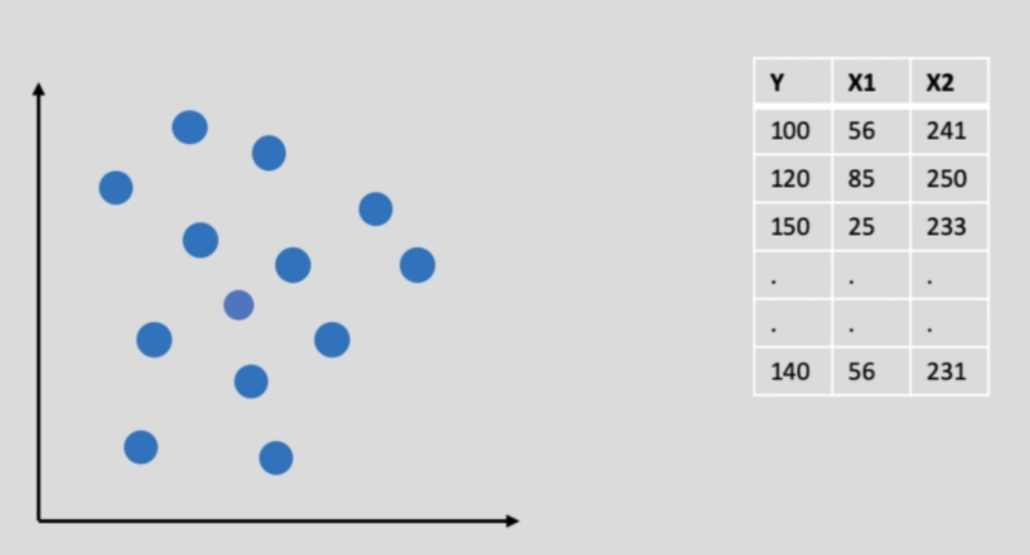</div>
* Yeni bir gözlem birimi geldiğinde y değerini tahmin etmeye çalışırız.
    * <div> 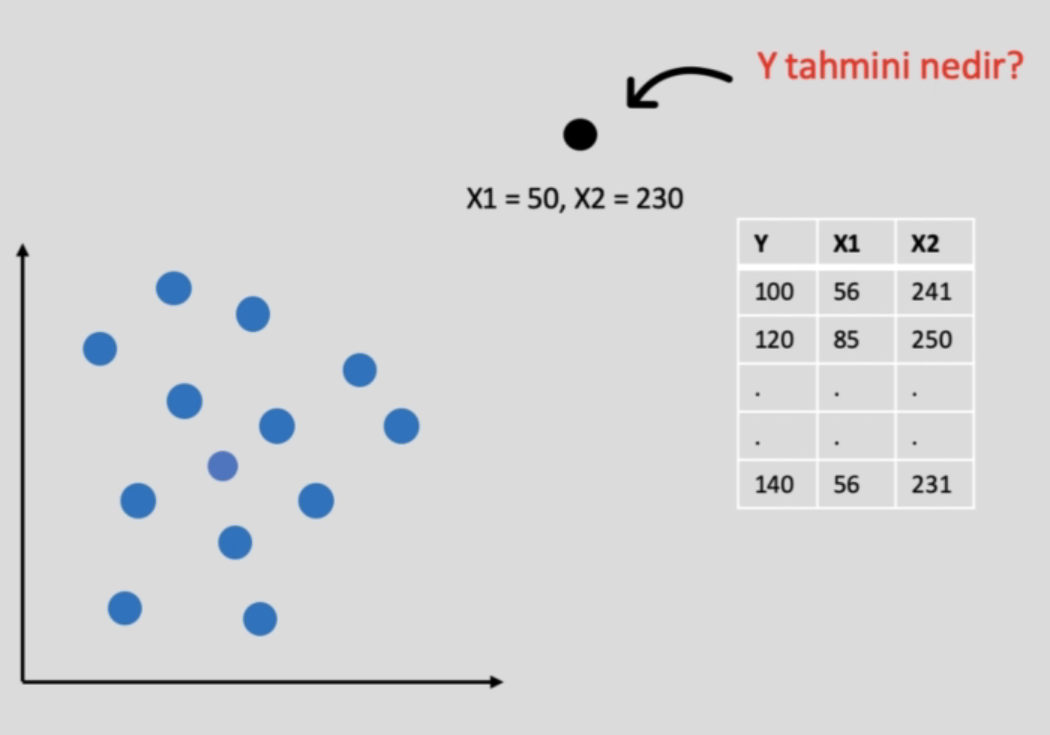</div>
* KNN algoritmasının burada gerçekleştirdiği işlem;
    * Öklid ya da benzeri bir uzaklık hesabı ile yen igelen gözlemin, verisetindeki her bir gözleme olan uzaklığı hesaplanır.
    * Daha sonra kendisine en yakın *k* adet gözlemin bağımlı değişken değerlerinin ortalaması alındığında yeni gelen gözlem biriminin bağımlı değişkenini bulmuş oluyoruz.
    * <div> 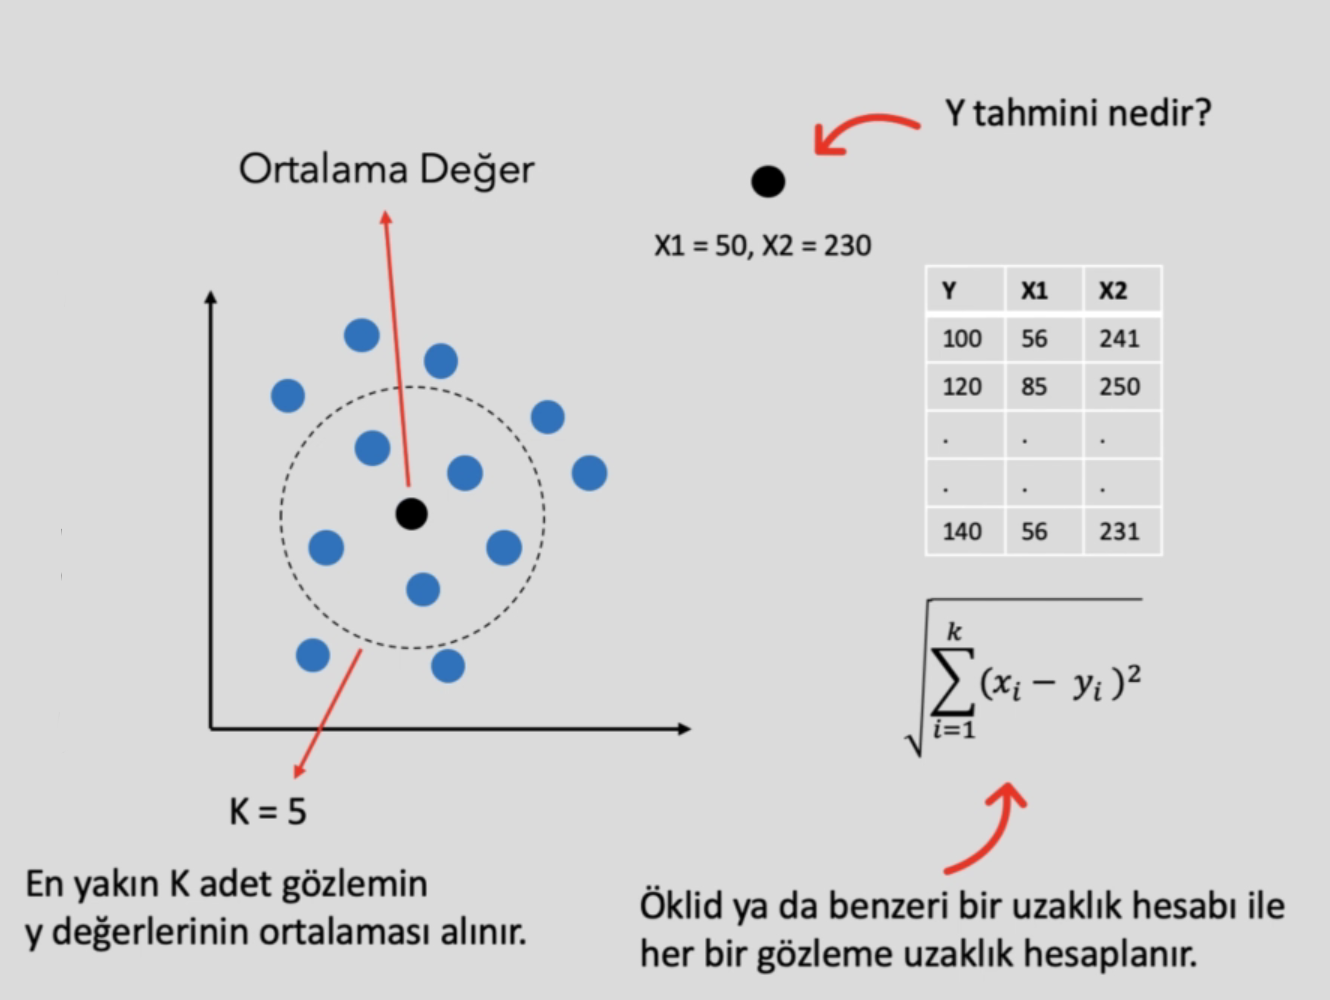</div>

**KNN Basamakları**
* Komşu sayısını belirle(K)
* Bilinmeyen nokta ile diğer tüm noktalar ile arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
* Sınıflandırma ise en sık sınıf değerini, regresyon ıse ortalama değeri tahmin değeri olarak ver.

### KNN - Model Oluşturma

In [2]:
df = pd.read_csv("./csv/Hitters.csv")
df = df.dropna()
df = df.iloc[:,1:]
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 0)

* KNN modeli **sklearn.neighbors** altında **KNeightborsRegressor** olarak geçmektedir.

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(X_train,y_train)

Burada modelin hiperparametresi olarak gosterebilecegimiz deger *n_neighbors* yani komsu sayisidir.

In [4]:
knn_model.n_neighbors

5

In [5]:
print("KNN Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,knn_model.predict(X_test))))

KNN Test Hatasi:	 420.224243098151


### KNN - Model Tuning
Bu bölüme tuning işlemini **GridSearchCV** fonksiyonu ile gerçekleştireceğiz. GridSearch, ızgara mantığıyla bir olası parametre setinin verilip tüm olası kombinasyonların denenmesiyle gerçekleştirilir.
* GridSearchCV içerisine parametre olarak verilecek K değerlerini bir **dictionary** içerisinde yollamamız gerekiyor.
* Bu sözlükte ise k değerleri value olurken key değeri ise KNN modelinin k parametresi olan **n_neighbors** ismi ile aynı olmalıdır.
* GridSearchCV ile fit edilmis model icerisinde en iyi parametre olan degeri **.best_params_["n_neighbors"]** sekklinde alabiliyoruz.

In [8]:
from sklearn.model_selection import GridSearchCV
knn_params = {"n_neighbors" : np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)
knn_cv_model.best_params_

{'n_neighbors': 12}

#### Ara not : Hatada Validasyonun Önemi
Normalde verisetini train ve test olarak ayirdiktan sonra herhangi bir validasyon islemi yapmadan test hatasini olcersek bu hata valide edilmemis hatadir. Bu hatanin validasyon isleminden gecmis hatadan farki ise en basta veri seti 80/20 sekline ayriliyor fakat bu ayrilma islemi bircok sekilde gerceklesebilecegi icin test veya egitim hatalari her seferinde farkli cikacaktir. Fakat validasyon isleminden elde edilen model uzerinde test veya egitim hatasini hesaplarsak tum veriler gozden gecilirmis oldugu icin test ve egitim hatalari veri seti uzerinde ayni cikacaktir. 

CV yontemiyle optimum parametre degerimizin 12 oldugunu buldugumuza gore final modelimizi kurabiliriz.

In [9]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)
print("Tuned KNN Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test))))

Tuned KNN Test Hatasi:	 425.72503392372045


## **b. Destek Vektör Regresyonu (SVR)**

### **i. Linear SVR**

* Amac, bir marjin araligina maksimum noktayi en kucuk hata ile alabilecek sekilde dogru ya da egriyi belirlemektir. 
* Cikis noktasi siniflandirma problemleri icin olsa da regresyona gore de ayarlanmistir.
* Dogrusal ve dogrusal olmayan olarak iki adet SVR bulunmaktadir. Burada Dogrusal olani ele aliyoruz.
* Regresyon problemlerine uygulandiginda kendisine Robust(Dayanikli) Regresyonlar arasinda yer bulmustur.
    * Robust Regresyon, EKK'da gerceklesen problemlere(cok boyutluluk laneti vb.) ve aykiriliklara daha az duyarli olan, bunlarla mucadele edebilen algoritmalara denir.
* Grafikte SVR'in nasil gerceklestirildigi gorulmektedir.
    * Regresyon modeli etrafindaki $\epsilon$ miktarlari *kabul edilen hata miktari*ni temsil eder. Marjin araligi da denir.
    * $\xi$ (ksi-xi) degerleri, kabul edilebilir araliklardan uzakta olan uc degerlerin mesafesini ifade etmektedir. Bunlar uc degerleri, artik degerleri, ayriki degerler ifade etmektedir.
    * Minimizasyon problemi formulunde gecen *C* ifadesi, karmasiklik parametresi veya ceza parametresi olarak isimlendirilir. Bunun islevi de $\xi$'ler uzerinde bir kontrol mekanizmasi isletmis oluruz. 
    * Kisitlarin sozel anlami ise; oyle bir regresyon degeri bulmana yardimci olacagim ki gercek degerler ile tahmin edilen degerler arasindaki farklar regresyon egrisinin iki yonunden belirli bir $\epsilon$ ve $\xi$ degerinden daha uzakta olmayacak.
    * <div> 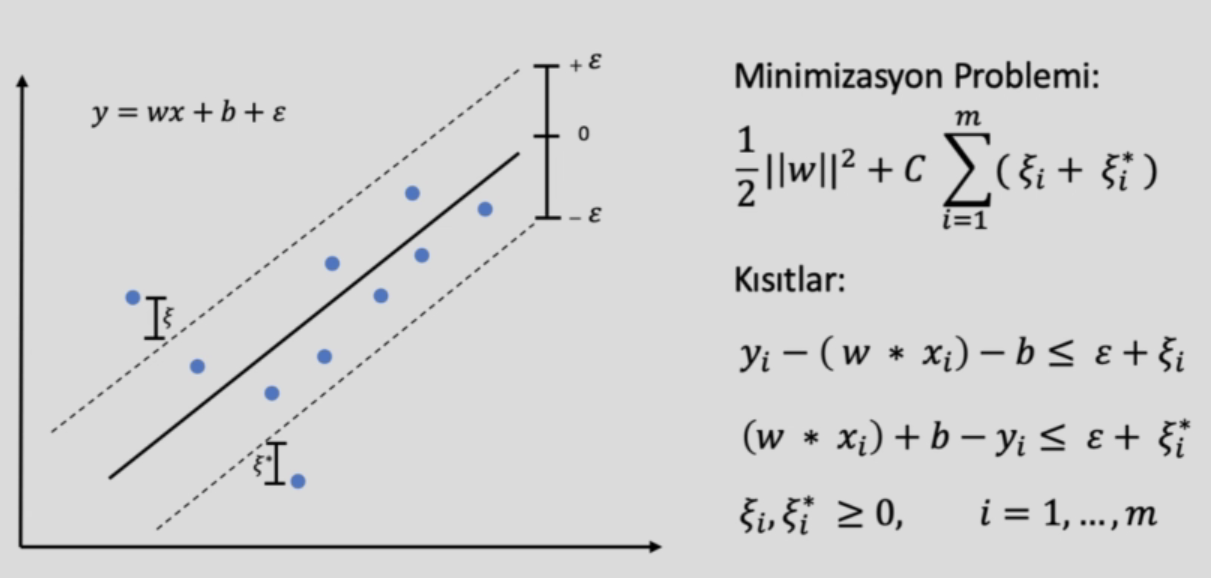</div>
* $\epsilon$ degerleri arasinda kalan degerler algoritma tarafindan hic kaale alinmaz. Algoritmanin dikkat ettigi degerler $\epsilon$ degeri disinda kalan artik degerler oluyor. Bu degerler SVR egrisini belirleyen degerlerin ta kendisidir.

### LSVR - Model Oluşturma

In [10]:
df = pd.read_csv("./csv/Hitters.csv")
df = df.dropna()
df = df.iloc[:,1:]
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 0)
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

Burada tek degiskenli Basit SVR uygulayacagiz daha sonrasinda basit dogrusal regresyon ile olan farkini karsilastirip yorumlamasini yapacagiz. Bunun icin ilk once **sklearn.svm** altindaki **SVR** fonksiyonunu dahil ediyoruz.

In [13]:
from sklearn.svm import SVR
svr_model = SVR(kernel="linear").fit(X_train,y_train)
svr_pred = svr_model.predict(X_train)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)
lm_pred = lm.predict(X_train)

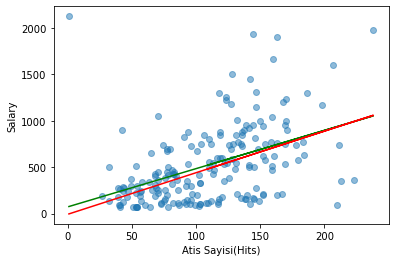

In [21]:
plt.scatter(X_train,y_train,alpha=0.5)
plt.plot(X_train,lm_pred,"g")
plt.plot(X_train,svr_pred,"r")

plt.xlabel("Atis Sayisi(Hits)")
plt.ylabel("Salary");

Bu grafikte yesil renkte olan Linear Regresyondur ve SVR cizgisinden yukarida bulunmaktadir. Bunun sebebi SVR'in Robust olmasidir yani aykiri degerlere dayaniklidir. Linear Regresyon EKK oldugu icin grafigin yukarisinda kalan aykiri degerler yesil dogruyu yukari cekmektedir. Bunu gozlemlemek amaciyla grafigi olusturduk.

In [23]:
np.sqrt(mean_squared_error(y_test,svr_model.predict(X_test)))

502.97505628068194

#### LSVR - Model Tuning
Burada tune etmemiz gereken parametre\ model altindaki **C** karmasiklik parametresidir. Burada yine GridSearchCV fonksiyonunu kullanacagiz.

In [25]:
svr_model.C

1.0

In [27]:
svr_param = {"C" : np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_param,cv=10).fit(X_train,y_train)
svr_cv_model.best_params_

{'C': 0.30000000000000004}

In [28]:
np.sqrt(mean_squared_error(y_test,svr_cv_model.predict(X_test)))

502.52899693480595

Buraya kadar gerceklestirdigimiz tum islemler "Hits" adli tek degisken uzerineydi. Simdi tum degiskenleri kullanarak tekrar ayni islemleri yapalim.

In [40]:
df = pd.read_csv("./csv/Hitters.csv")
df = df.dropna()
df = df.iloc[:,1:]
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [30]:
# Calistirilmasi tavsiye edilmez.
svr_model = SVR(kernel="linear").fit(X_train,y_train)
svr_params = {"C" : np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [32]:
svr_cv_model.best_params_

{'C': 0.1}

In [33]:
np.sqrt(mean_squared_error(y_test,svr_cv_model.predict(X_test)))

377.4497738793681

### **ii. Non-Linear SVR**
Dogrusal olmayan SVR modeli **rbf** kerneli ile kurulur. Radial Basis Function

In [36]:
svr_rbf = SVR(kernel="rbf").fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test)))

551.831814647037

#### NLSVR - Model Tuning
Burada tune etmemiz gereken parametre\ model altindaki **C** karmasiklik parametresidir. Burada yine GridSearchCV fonksiyonunu kullanacagiz.

In [37]:
svr_rbf.C

1.0

In [52]:
svr_params = {"C" : np.arange(10,250,10)}
svr_cv_model = GridSearchCV(svr_rbf,svr_params,cv=10).fit(X_train,y_train)
svr_cv_model.best_params_

{'C': 240}

In [54]:
svr_tuned = SVR(kernel="rbf",C = svr_cv_model.best_params_["C"]).fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,svr_tuned.predict(X_test)))

421.15979908435304

## **c. Yapay Sinir Ağları (ANN - Artificial Neural Network)**

Bu bölüm özet şeklinde ele alınmıştır. Detayları anlatımları derin öğrenme notlarında değineceğim. Daha güzel anlatım için; <br>
<a href="http://introtodeeplearning.com/">Introduction to Deep Learning MIT</a>

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenme algoritmalarından birisidir.
* Yapay sinir ağlarına geçmeden önce insan beynindeki sinir ağlarının yapısıyla ilgili kısa bir özet geçelim.
    * **Dendrit :** Alınan sinyalleri hücre çekirdeğine iletmek ile görevlidir.
    * **Soma :** Dendritlerden gelen sinyalleri bir noktada toparlar. Dendritlerden gelen sinyaller toparlanırken çekirdek bu konuda seçicilik gösterebilir.
    * **Akson :** Aksonun görevi somada toplanan sinyalleri diğer sinir hücrelerine iletmektir. 
    * **Snapsis :** Sinyaller diğer hücrelere aktarılmadan önce burada bir önişleme tabi tutulur. Buradaki işlem sinyalleri belirli bir eşik değerine denk getirecek şekilde işlemektir, daha sonrasında diğer hücrelere iletim gerçekleşir.
    * <div> 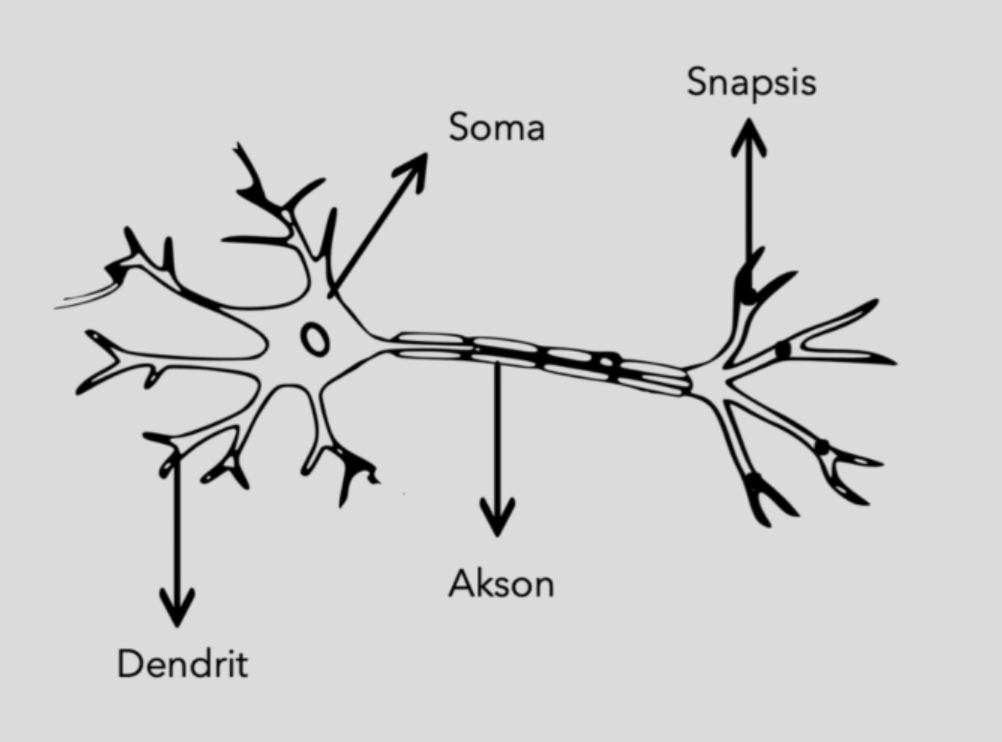</div>
* Basit yapay sinir hücresine değinirsek;
    * Girdiler dendtritleri, toplama fonksiyonu ise somayı, toplama fonksiyonu ile aktivasyon fonksiyonu arasındaki ilişkiyi akson ile ifade ederken, aktivasyon fonksiyonu için de snapsis benzetmesini yapabiliriz.
    * **Girdiler**, bağımsız değişkenlerin değerlerini ifade etmektedir.
    * **Ağırlıklar**, her bir bağımsız değişkenin çıktıya olan etkisini ayarlayan hiperparametrelerdir.
    * **Toplama fonksiyonu** ile her bir bağımsız değişken ile o değişkene ait olan ağırlığın çarpımlarının toplanmasını sağlıyor.
    * **Aktivasyon fonksiyonu** ise oluşan linear fonksiyonu, ifade edilebilirliği arttırmak amacıyla non-linear şekle çevirmek için kullanılan fonksiyondur. Sigmoid, ReLU vb.
    * <div> 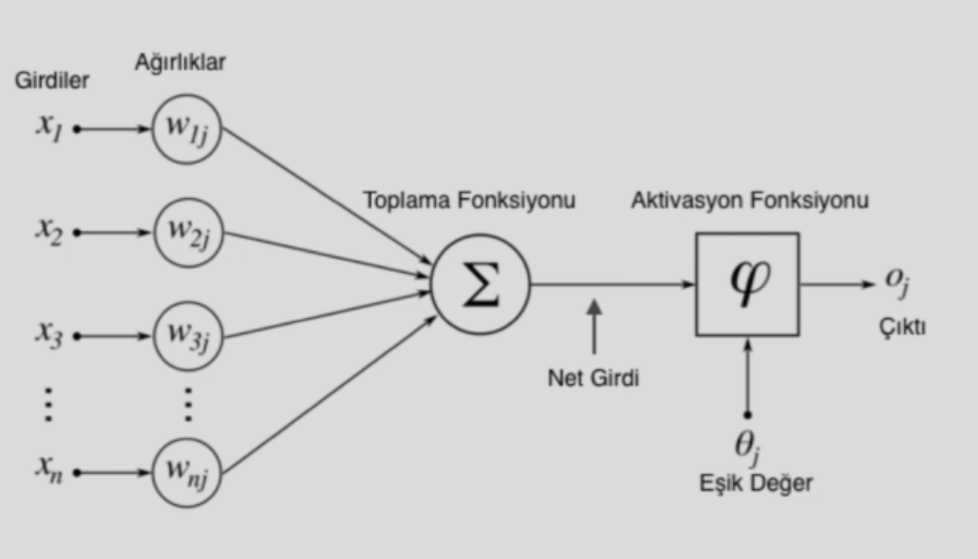</div>
* Basit yapay sinir hücrelerinin biraraya gelmesiyle yapay sinir ağları oluşur.
    * Yapay sinir ağları, birbiriyle ilişkilendirilmiş hücrelerden oluşur.
    * Bu ağı oluşturan birimlere nöron adı verilir.
    * Katman sayısını belirtirken input katmanını işin içerisine katmayız. Hidden+Output(1) şeklinde hesaplanır.
    * Burada **tahmin işlemi**, forward propagation ile ileri gidilerek yapılır, **öğrenme işlemi** de backpropagation ile geriye doğru türev ile gidilerek ağırlıkların güncellenmesiyle gerçekleşir.
    * Backpropagation garanti bir öğrenim yolu değildir, bulunan ağırlıklardan daha optimize olan bir ağırlık var olabilir. Global minimum, local minimum durumu.
    * Overfit olmaya meğillidir.
    * <div> 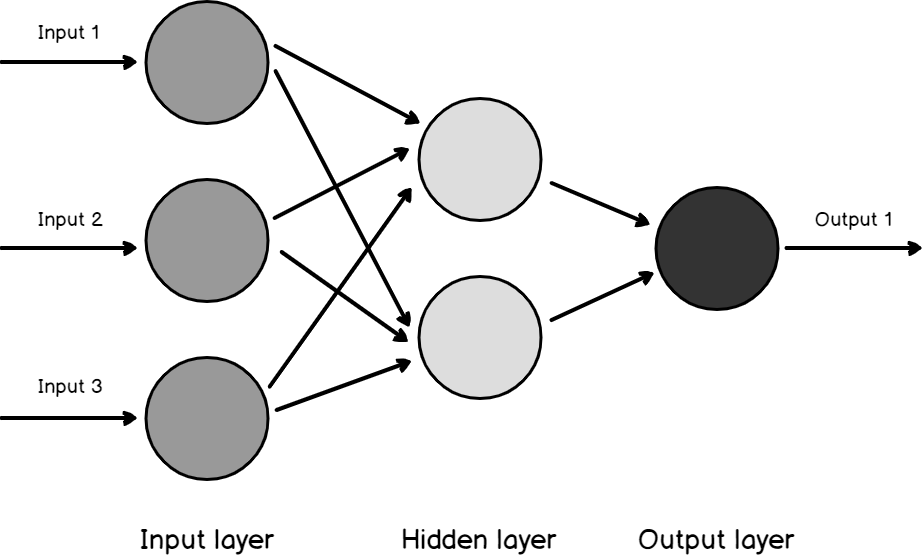</div>
* Yapay sinir ağlarının formülasyonundan bahsetmek gerekirse;
    * $\beta_{0k}$ degeri bias degeridir. $w_0$
    * $x_j$ bagimsiz degiskenleri temsil etmektedir.
    * $\beta_{jk}$ degiskenin agirligini temsil eder.
    * $k$ degeri katman sayisini belirtir.
    * $P$ degeri bagimsiz degisken sayisini temsil eder.
    * $g(u)$ fonksiyonu aktivasyon fonksiyonudur.
    * $h_k$ bir perceptronun cikti fonksiyonudur.
    * $f(x)$ perceptronlardan olusmus yapay sinir aginin formulasyonudur.
    * En alttaki formulasyondaki $\lambda$ degeri learning rate olarak tanimlanmaktadir. Kullanici tarafindan tanimlanan bir hiper parametredir. Overfit olmasini engellemek icin kullanilan yontemlerden bir tanesidir. 0 ile 1 arasinda deger alir.
    * <div> 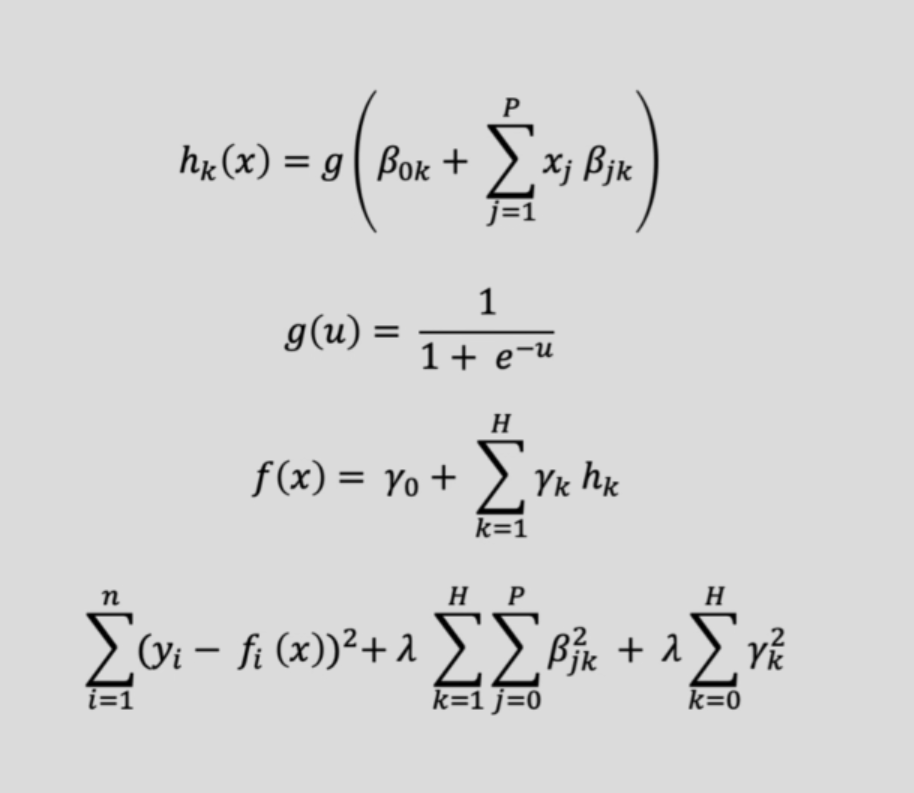</div>
    * Daha genel gecer fonksiyonlar icin:
        * Ekran goruntuleri '6S191_MIT_DeepLearning_L1.pdf'inden alinmistir. 
        * <div> 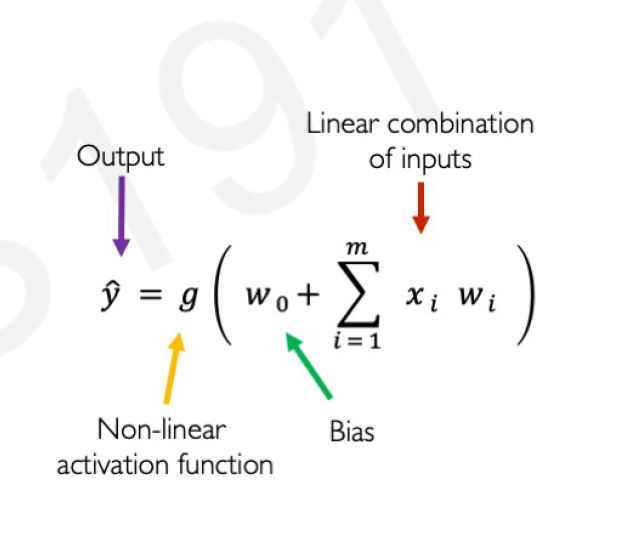</div>
        * Burada $X$ degeri x bagimsiz degiskenlerinin vektor olarak verildigini belirtmektedir. $X^T$ ise yine vektor olan $W$ agirlik degerleriyle carpim islemini gerceklestirebilmek icin alinmis olan transpoz islemini ifade etmektedir.
        * <div> 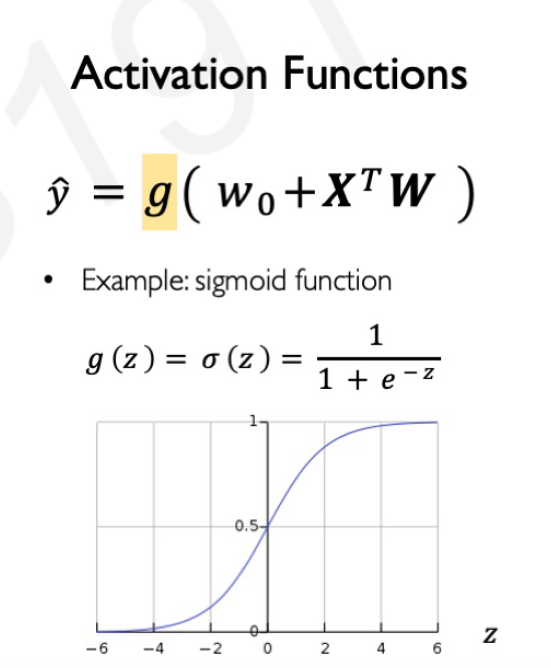</div>
        * Basit bir perceptron ornegi;
        * <div> 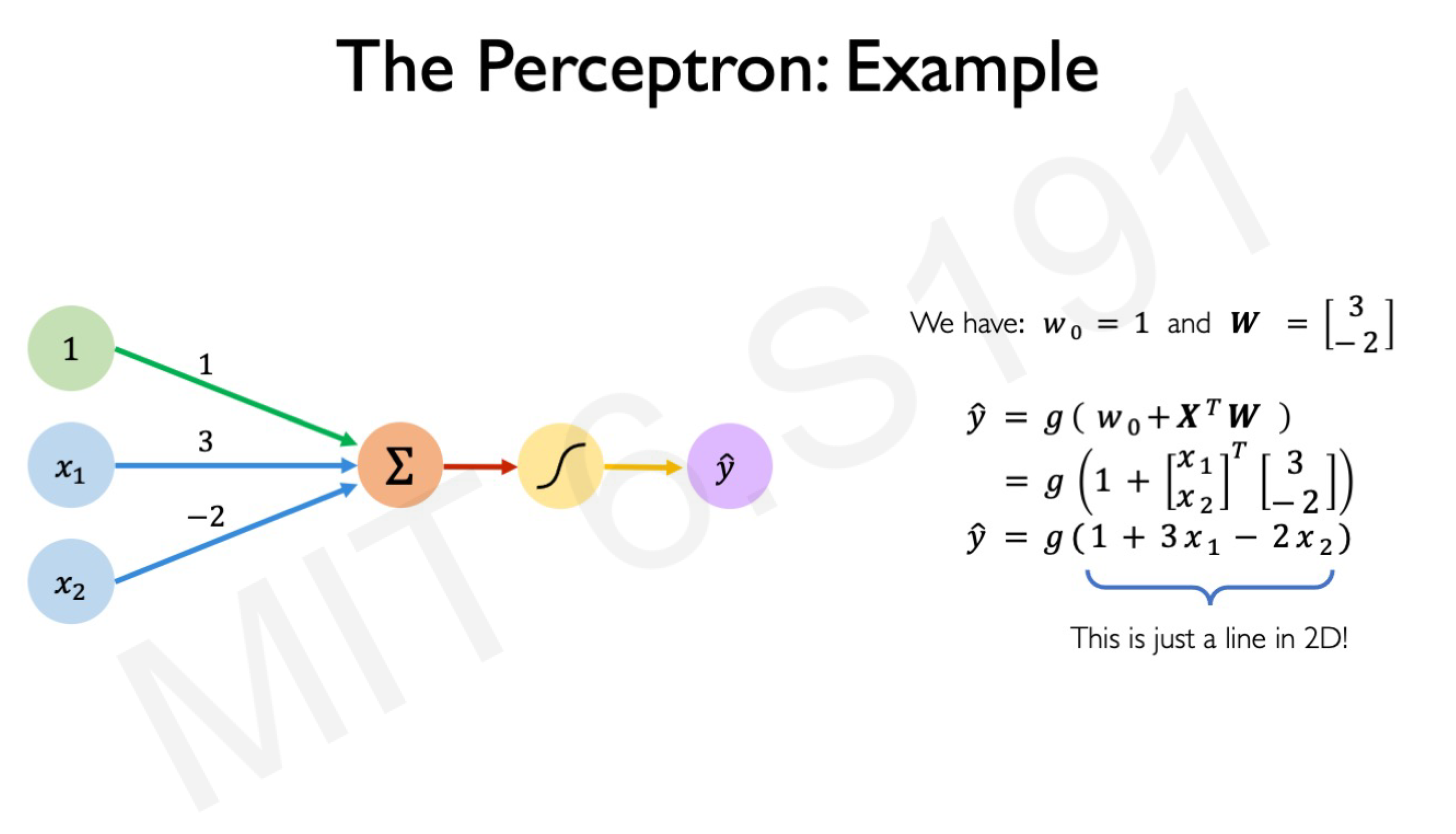</div>
        * <div> 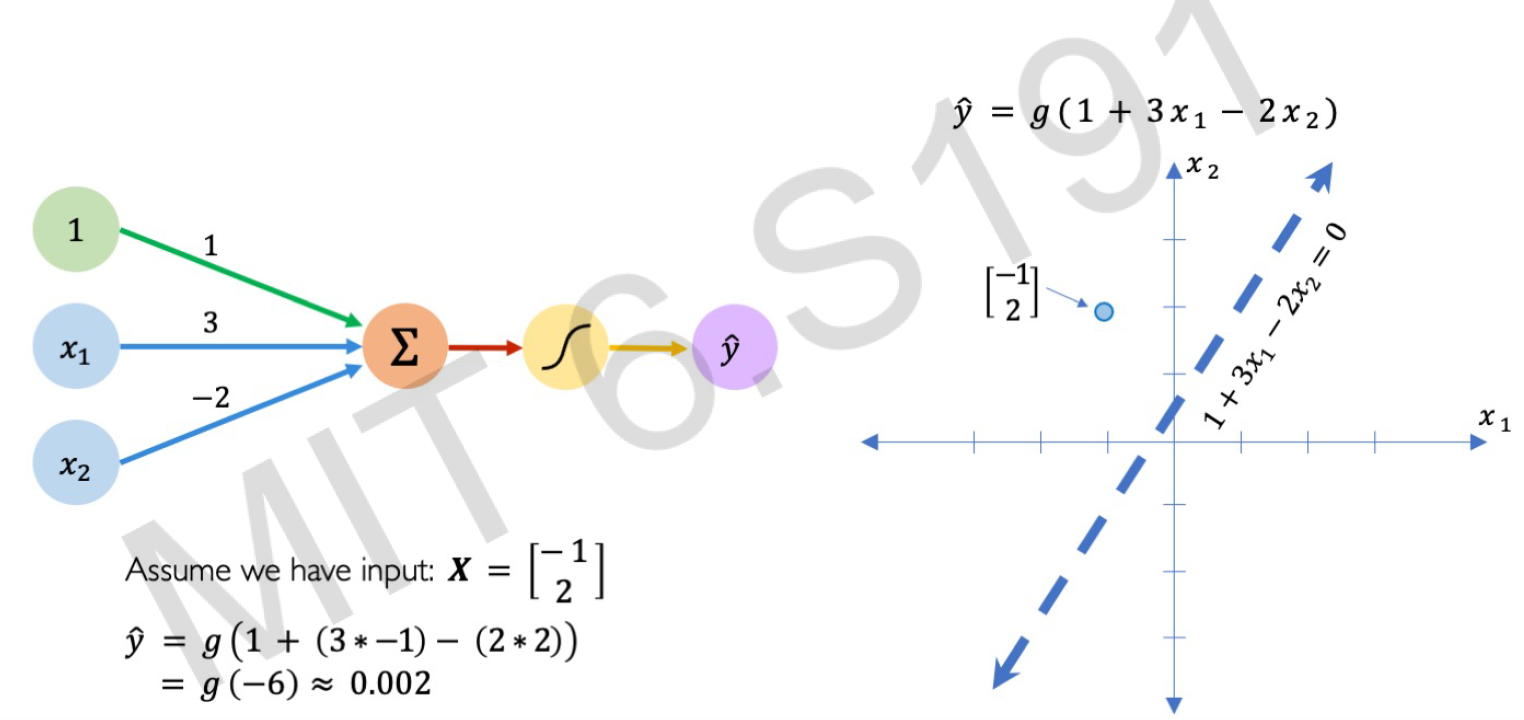</div>
        * <div> 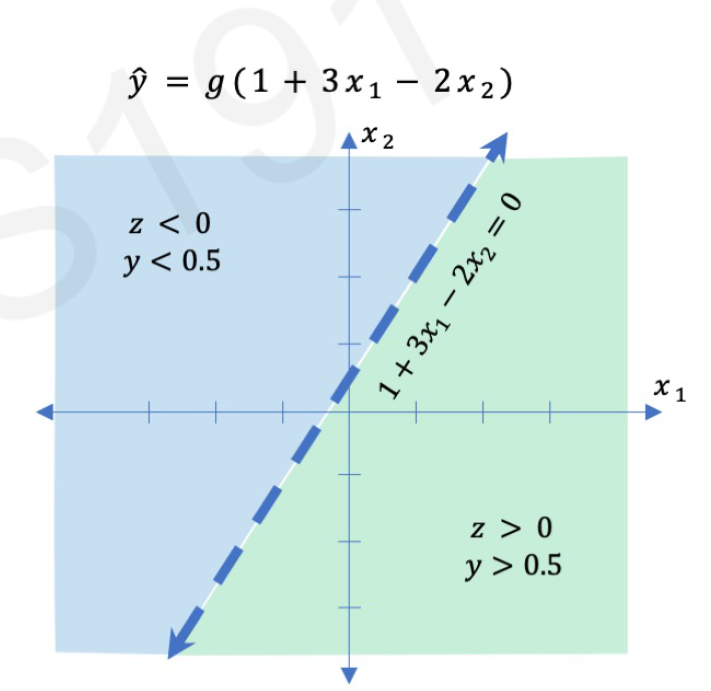</div>
        * Perceptronun basitlestirilmis ifadesini asagida gorebilirsiniz.
        * <div> 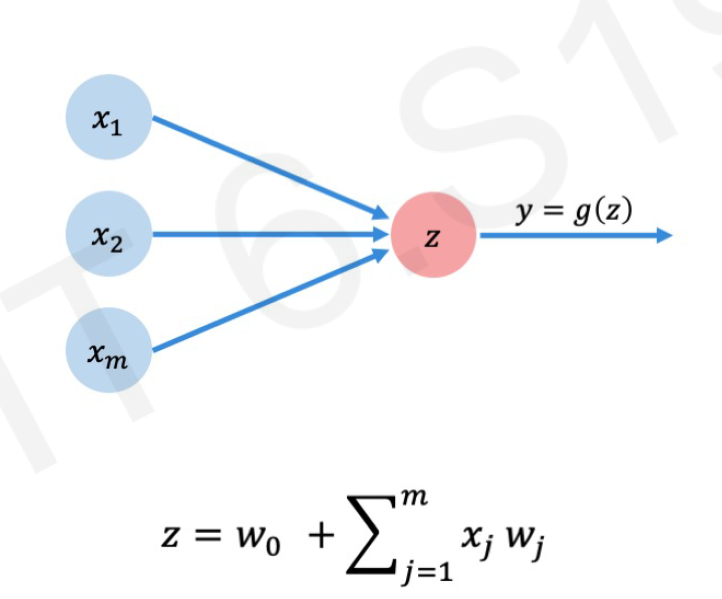</div>
        * Dense katmanlarin sayisi bizim katman sayimizi belirtir. Bu sayinin temsili $i$ ile formulasyonda temsil edilir. Her katmanin kendi agirligi ve ciktisi olacagi icin z ve w icin kullanilmistir.
        * <div> 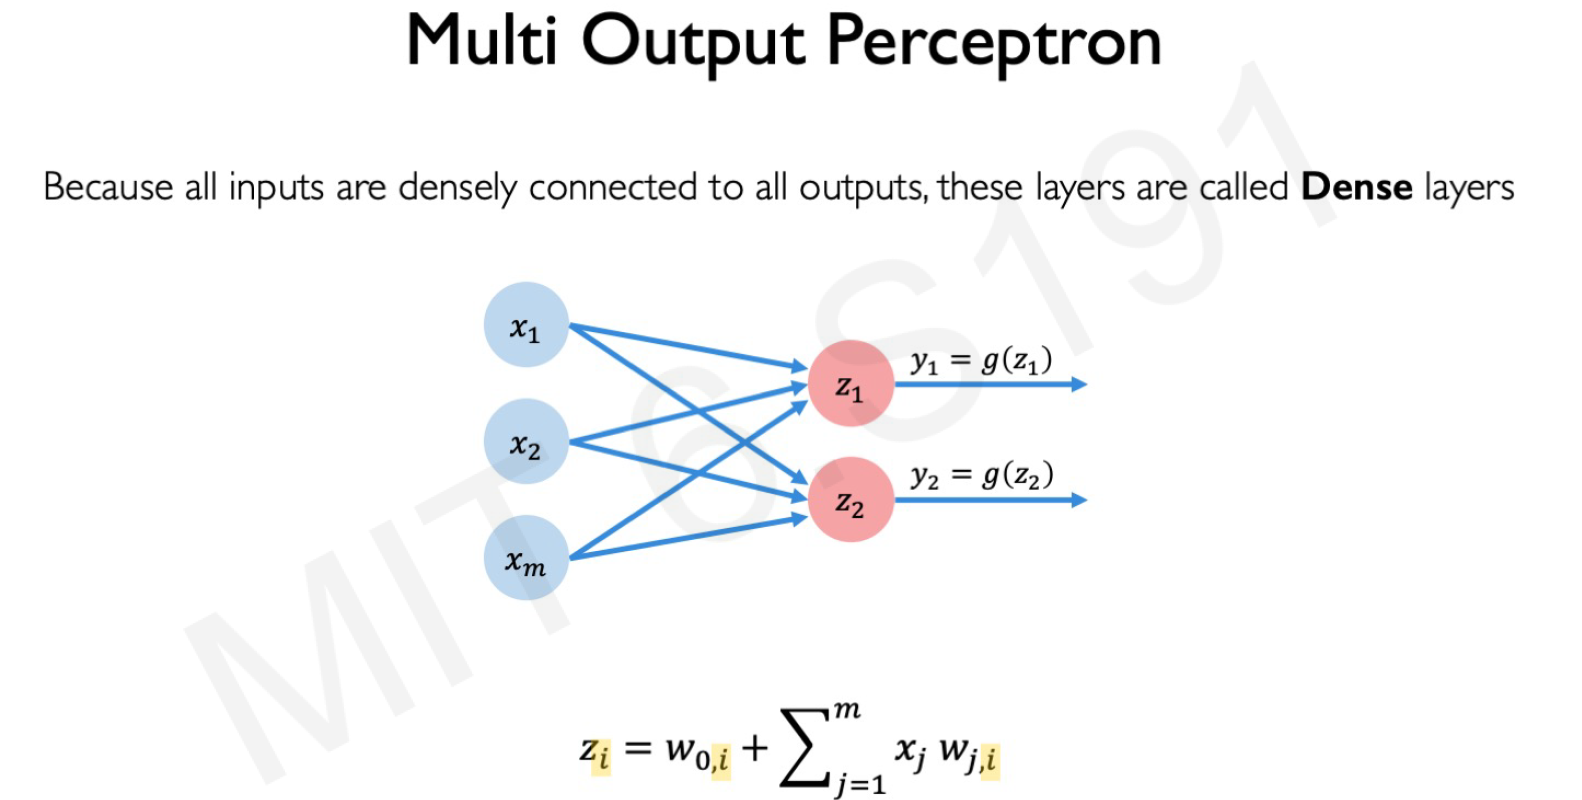</div>
        * <div> 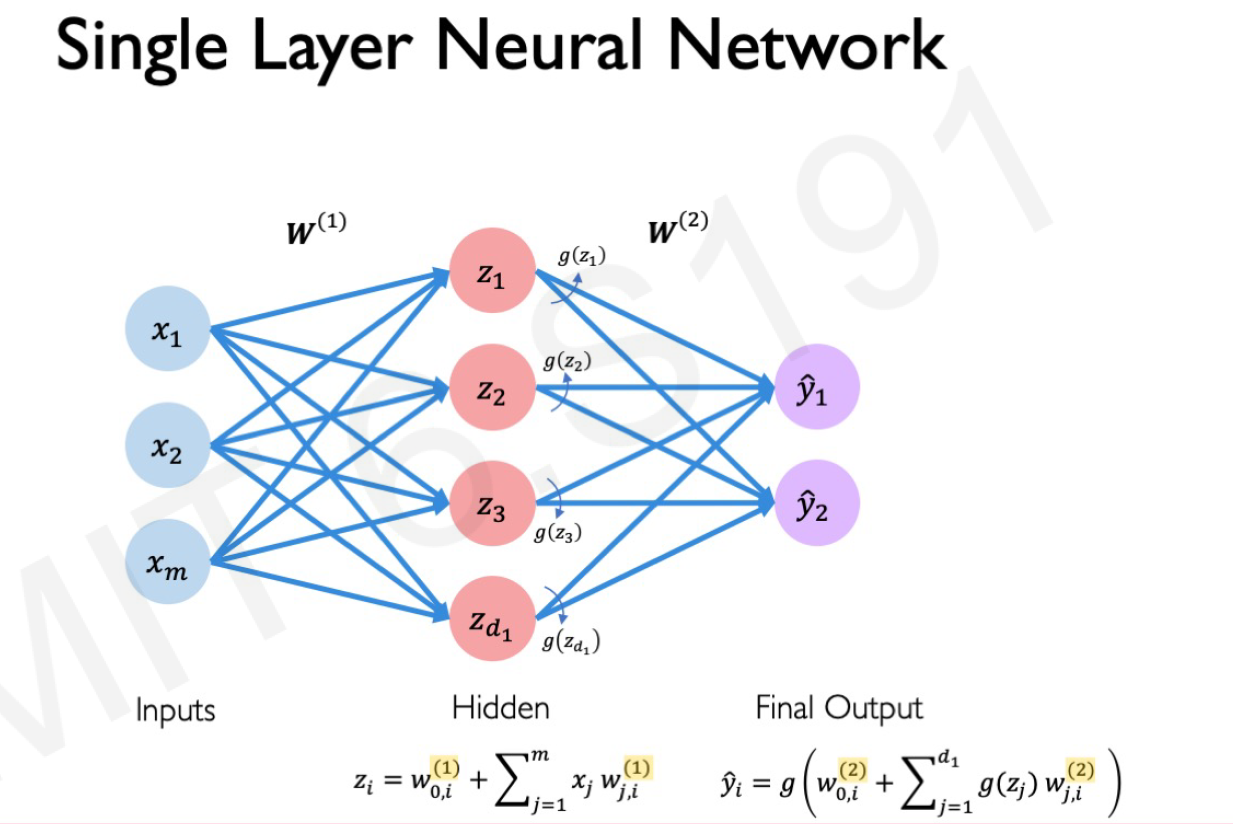</div>
        * <div> 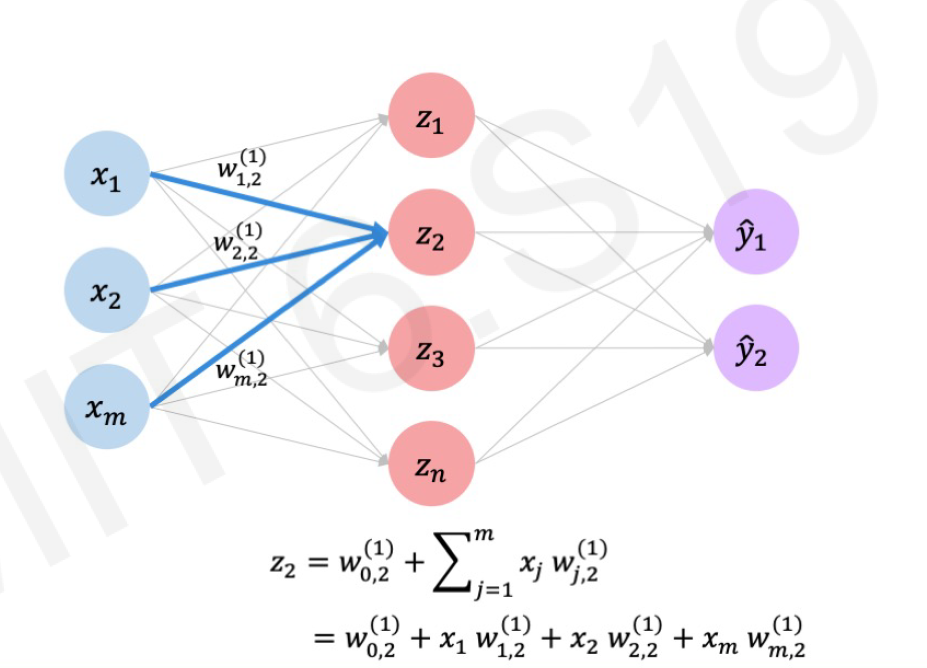</div>

### ANN - Model Oluşturma

Yapay sinir ağı oluşturmadan önce verimizi **StandardScaler** yardımıyla scale etmemiz gerekiyor.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Burada Scikit-learn altindaki Multi-layer Perceptron regressor kullanacagiz.<br>
Bunun icin **sklearn.neural_network** altindaki **MLPRegressor** fonksiyonunu import ediyoruz.

In [26]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20,20)).fit(X_train,y_train)

C:\Users\ea\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelimizin katman sayisina *n_layers_* araciligiyla ulasabiliriz.

In [25]:
mlp_model.n_layers_

5

In [27]:
mlp_model.predict(X_train)[:5]

array([215.4352295 , 709.72293154, 282.30719443, 421.82905594,
       207.24265478])

In [28]:
print("Ilkel Test Hatasi :\t",np.sqrt(mean_squared_error(y_test,mlp_model.predict(X_test))))

Ilkel Test Hatasi :	 389.47984049671305


#### ANN - Model Tuning
Burada tune etmemiz gereken hiperparametreler learning rate olan alpha,lambda degeridir. Fakat hidden layerlarda bulunacak olan noron sayisini belirtmemiz performansimizi arttirabilir ve farkli aktivasyon fonksiyonlari da kullanmak performansimizi arttirabilecek etmenlerdir. Tune islemini **GridSearchCV** fonksiyonu ile gerceklestirecegiz.

In [38]:
from sklearn.model_selection import GridSearchCV

mlp_params = { "alpha" : [0.00001,0.001,0.001052,0.1,0.01],
              "hidden_layer_sizes" : [(300,150,75,35,15),(100,50,25)],
              "activation" : ["relu","logistic"]
                }

In [39]:
from warnings import filterwarnings
filterwarnings('ignore')

In [40]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=10).fit(X_train,y_train)

In [41]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25)}

In [50]:
mlp_tuned = MLPRegressor(alpha=0.001,activation="relu",hidden_layer_sizes = (100, 50, 25)).fit(X_train,y_train)
print("Validasyondan gecmis test hatasi:\t",np.sqrt(mean_squared_error(y_test,mlp_tuned.predict(X_test))))

Validasyondan gecmis test hatasi:	 380.89177511220015


## **d. Classification And Regression Trees (CART)**

Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.
* CART algoritması Bagged Decision Trees, RF ve Boosted DT için temel sağlamıştır.
* Karar ağaçları kullanılır.
* Her root node'u tek bir input değerini gösterir ve iki dala ayrılır.
* Yaprak düğümler tahmin etmek için kullanılan y değerlerini içerirler.
* Aşağıdaki örnekte iki adet input bulunmaktadır, bunlar *height* ve *weight* değerleridir. Output olarak iki değer bulunmaktadır, bunlar *male* ve *female* degerleridir.
* Asagidaki karar agacinin kural seti ise;
    * If Height > 180 cm Then Male<br>
        If Height <= 180 cm AND Weight > 80 kg Then Male<br>
        If Height <= 180 cm AND Weight <= 80 kg Then Female<br>
        Make Predictions With CART Models<br>
    * 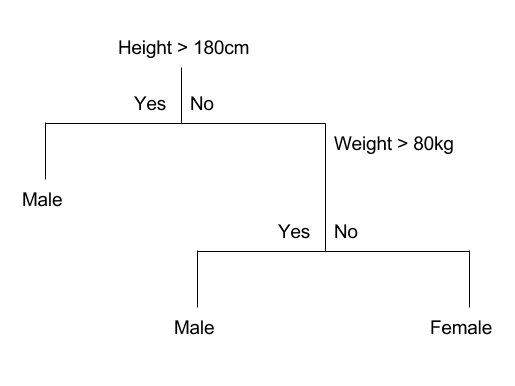
* Burada en cok karar etkisine sahip olan en ustteki dugum degeridir. Height 180den yuksekse weight degerinin ne oldugu onemli degildir.
* Binary treenin ogrenme yontemi giris degerlerinin uzayini bolerek gerceklestirir.
    * 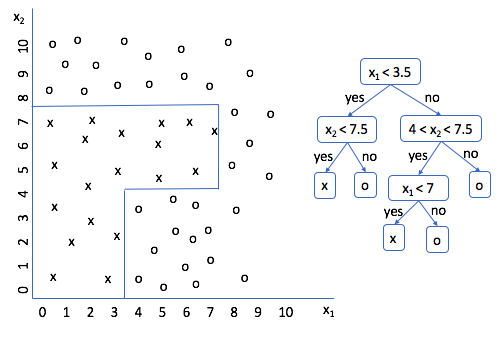
* CART yonteminde dallanmanin artmasiyla ornek veriseti cok iyi temsil edilebileceginden dolayi overfitting tehlikesini barindiriyor. Bu dallanmanin onune gecmek icin *Pruning The Tree* yani agac budama yontemi kullanilir. Yani karmasiklik parametresi belirlenir ve bu parametre yardimiyla dallanma belli bir noktada durdurulur. Bu parametreyi yine CV yontemiyle bulmaya calisacagiz. 
* Decision tree ile ilgili onemli bir nokta ise;
    * Genellenebilirlik kavramidir.
    * Kuracak oldugumuz modelin *genellenebilirlik kaygisi yoksa* veriseti icerisindeki varyansi aciklama konusunda *single threaded tree*ler cok basarilidir. 
    * Genellenebilirlik ile ilgili ise;
        * Genellenebilirlik kaygısı varsa şu demek oluyor: Yeni bir veri geldiğinde modelin doğru tahmin yapabilmesi. Yani oluşturulan modelin yeni veri girişlerinde de doğru sonuç vermesi.( Bu nedenle overfit ya da underfit olmaması gerek)<br><br>
            Genellenebilirlik kaygısı yoksa şu demek oluyor: Amacımız; öyle bir model oluşturalım ki yeni gelen verileri de tahmin etsin, genellenebilir bir model olsun DEĞİL de " sadece elimizdeki veri setini tanıyalım"sa eğer... Örneğin deneyim yılı şunun altında olanlar hangi maaşı alıyor, yaşı bunun üzerinde olanlar hangi maaşı alıyor gibi elimizdeki veriyi açıklamaya çalışıyorsak...CART bize kolayca anlayabileceğimiz sonuçlar veriyor<br><br>
            Yani aslında modelimiz elimizdeki dataya overfit oluyor, ama zaten bizim genelleme kaygımız olmadığı için overfit olmasında da sorun yok. Çünkü biz sadece elimizdeki veri setini anlamaya çalışıyoruz....Yani benim modelim bu veri setini aşırı öğrensin ve bana bu veri seti ile ilgili tam bilgiler versin.. Yeni veri girip de tahmin etme gibi bir amacım zaten yok.... sa eğer CART bize çok yardımcı oluyor..

### CART - Model Oluşturma

Oncelikle *Salary* degiskeni ile *Hits* degiskeni arasindaki durumu eksenlerce ifade etmek icin *Hits* degiskenini seciyoruz.

In [3]:
x_tr_hits = pd.DataFrame(X_train["Hits"])
x_ts_hits = pd.DataFrame(X_test["Hits"])

CART modelini **sklearn.tree** altindan **DecisionTreeRegressor** fonksiyonunu dahil ederek yolumuza devam ediyoruz.

In [4]:
from sklearn.tree import DecisionTreeRegressor

cart_model = DecisionTreeRegressor().fit(x_tr_hits,y_train)

Dallanmalari ve kirilmalari gorebilmek adina modelimizi gorsellestirmeye calisacagiz.

Text(0, 0.5, 'Salary')

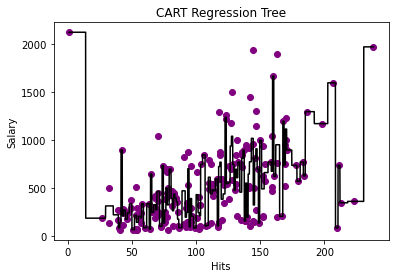

In [8]:
X_grid = np.arange(min(np.array(x_tr_hits)),max(np.array(x_tr_hits)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(x_tr_hits,y_train,color='purple')
plt.plot(X_grid,cart_model.predict(X_grid),color = 'black')
plt.title("CART Regression Tree")
plt.xlabel("Hits")
plt.ylabel("Salary")

Olusturdugumuz agac modelinin kural setini edinmek istedigimizde;
* **!pip install skompiler** ile skompiler kutuphanesini kurmamiz gerekiyor.
* **from skompiler import skompile** ile projemize dahil ediyoruz.
* Daha sonra **skompile(cart_model.predict).to("python/code")** ile modelimizin kural setini python koduna compile etmis oluyoruz.

In [9]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57151 sha256=be5fa6f6e78e5ac86c883e03371217152ee36cdc1abc369e46e0644010ce3c27
  Stored in directory: c:\users\ea\appdata\local\pip\cache\wheels\1a\57\a0\4940fe9698fe2ec1e619757c6d2258b1026cb24b88562811ed
Successfully built skompiler


In [13]:
from skompiler import skompile

skompile(cart_model.predict).to("python/code")

'((2127.333 if x[0] <= 14.0 else ((((190.0 if x[0] <= 29.5 else 317.5 if x[0\n    ] <= 35.5 else 225.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else \n    140.83333333333334) if x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((\n    215.55566666666667 if x[0] <= 43.5 else 275.0) if x[0] <= 45.0 else \n    180.0) if x[0] <= 46.5 else 245.0) if x[0] <= 48.0 else 337.5) if x[0] <=\n    50.0 else 70.0 if x[0] <= 52.0 else ((((220.625 if x[0] <= 53.5 else \n    146.83333333333334 if x[0] <= 55.0 else 210.0 if x[0] <= 56.5 else \n    193.75) if x[0] <= 57.5 else 340.0) if x[0] <= 59.0 else 90.0) if x[0] <=\n    61.5 else 341.667) if x[0] <= 63.5 else 75.0) if x[0] <= 64.5 else (((\n    650.0 if x[0] <= 65.5 else (((((((250.0 if x[0] <= 67.0 else 330.25 if \n    x[0] <= 68.5 else 277.5) if x[0] <= 69.5 else 468.0) if x[0] <= 71.5 else\n    105.0) if x[0] <= 73.5 else 737.5) if x[0] <= 74.5 else 140.0 if x[0] <=\n    75.5 else 263.3333333333333) if x[0] <= 76.5 else 505.0 if x[0] <= 77.5\n   

In [14]:
print("ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,cart_model.predict(x_ts_hits))))

ilkel Test Hatasi:	 525.137657930558


#### CART - Model Tuning
Burada tune etmemiz gereken parametreler *min_samples_split* ve *max_leaf_nodes*dir. Tune islemini **GridSearchCV** fonksiyonu ile gerceklestirecegiz.

In [36]:
cart_params = {"min_samples_split" : range(2,100),
              "max_leaf_nodes" : range(2,10)}

In [37]:
from sklearn.model_selection import GridSearchCV
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [38]:
cart_cv_model.best_params_

{'max_leaf_nodes': 6, 'min_samples_split': 62}

In [39]:
print("Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,cart_cv_model.predict(X_test))))

Test Hatasi:	 397.7694231237775


## **e. Bagged Trees (Bootstrap Aggregation)**

Temeli bootstrap yontemi ile olusturulan birden fazla karar agacinin urettigi tahminlerin bir araya getirilerek degerlendirilmesine dayanir.
* Ensemble Ogrenmenin bir ornegidir.
    * Ensemble Ogrenme : Topluluk ogrenmesidir. Internal ve external olarak ikiye ayrilmaktadir. Internal, modellerin kendi icinde ensemble learningi tasimasidir. Bagging, rf, xgboost ve gbm buna bir ornektir. Yani kendi icerisinde birden fazla agac bulundurmaktadir. External ise birden farkli algoritmalarin bir araya gelip bir model uzerinde calismasina denmektedir. 
* Gerceklestirimi gorsel olarak ifade etmek gerekirse;
    * Bagging modelinin kilit noktasi, bootstrap rastgele ornekleme yontemidir.
    * Buradaki agaclarin, daha onceki agaclar gibi bir bagimliligi bulunmamaktadir. Orneklerin her bir agac uzerinde kullanilma sansi esittir. 
    * Bu yontem RMSE degerini dusuren, varyansi dusuren ve ezberlemeye karsi dayanikli olan bir algoritmadir.
    * <div> 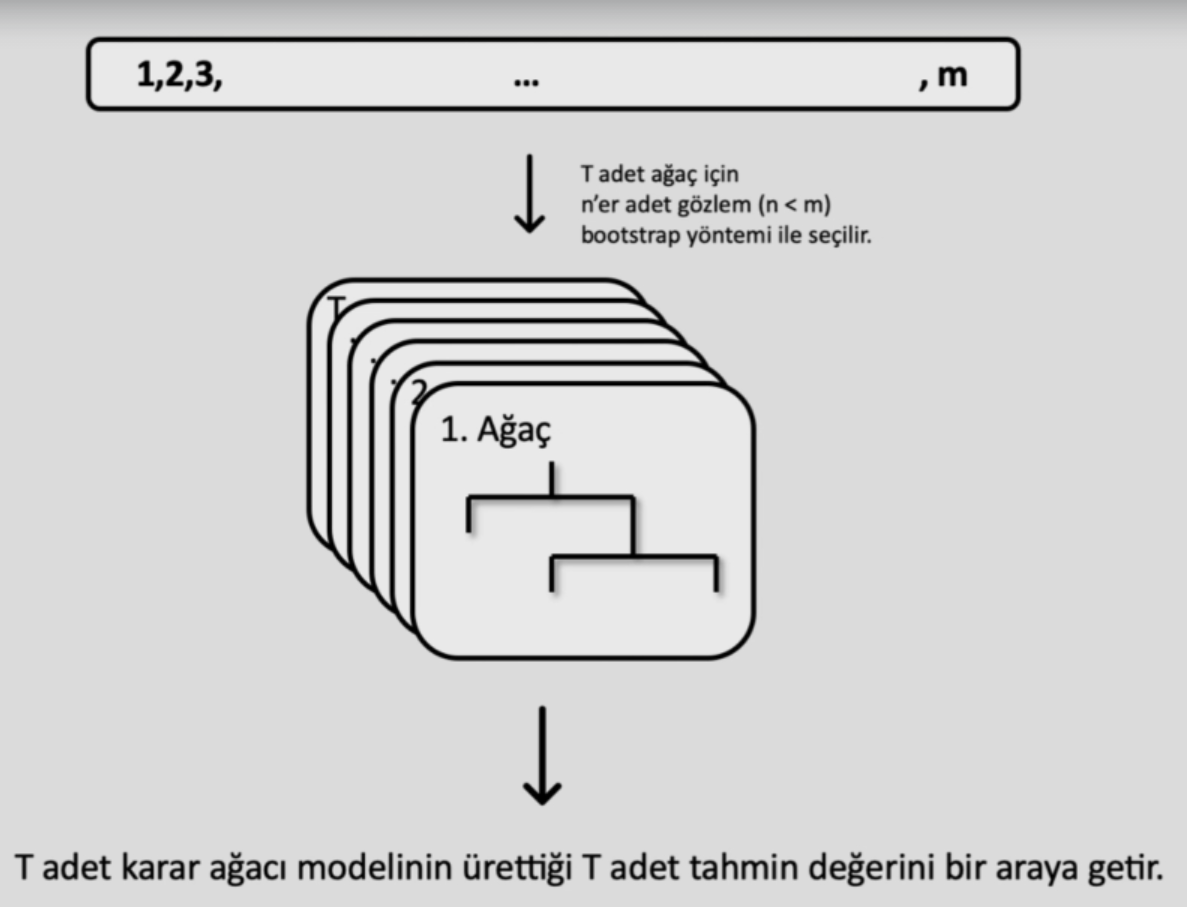</div>

### BT - Model Oluşturma

Fonksiyonumuzu **sklearn.ensemble** altindan **BaggingRegressor** ile projemize dahil ediyoruz. Modelimizi olustururken **bootstrap_features** parametresini True atamamiz  gerekiyor. Cunku bootstrap tabanli bagging islemi yapmak istiyoruz.
* n_estimators : birbirinden farkli olusturulan agaclarin sayisini vermektedir.
* estimators_ : birbirinden farkli olan agaclari bize dondurmektedir.
* estimators_samples_ : herbir agactaki ornekleri alabiliriz.
* estimators_features_ : herbir agacin bagimsiz degiskenlerine ulasabiliriz.

In [44]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor(bootstrap_features=True).fit(X_train,y_train)

In [45]:
bag_model.n_estimators

10

In [48]:
bag_model.estimators_[:4]

[DecisionTreeRegressor(random_state=2140778091),
 DecisionTreeRegressor(random_state=860777050),
 DecisionTreeRegressor(random_state=1923683855),
 DecisionTreeRegressor(random_state=714241065)]

In [49]:
print("Ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,bag_model.predict(X_test))))

Ilkel Test Hatasi:	 325.7203479658784


Eger tek bagging icerisindeki tek bir agacin performansini merak ediyorsak yine estimators uzerinden ulasip test hatasini degerlendirebiliriz.

In [50]:
print("7.Agacin Ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,bag_model.estimators_[6].predict(X_test))))

7.Agacin Ilkel Test Hatasi:	 359.2351832623868


#### BT - Model Tuning

In [52]:
bag_params = {"n_estimators" : range(2,50)}

bag_cv_model = GridSearchCV(bag_model,bag_params,cv=10).fit(X_train,y_train)

In [53]:
bag_cv_model.best_params_

{'n_estimators': 13}

In [54]:
print("Validasyon Sonrasi Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,bag_cv_model.predict(X_test))))

Validasyon Sonrasi Test Hatasi:	 354.31182405985413


## **f. Random Forest**

Temeli birden cok karar agacinin urettigi tahminlerin bir araya getirilerek degerlendirilmesine dayanir.
* Bagging(Breiman,1996) ile Random Subspace(Ho,1998) yontemlerinin birlesimi ile olusmustur.
* Agaclar icin *gozlemler Bootstrap rastgele ornek secim yontemi* ile *degiskenler ise Random Subspace yontemi* ile secilir. Boylece hem gozlemlerde hem de degiskenlerde rassalli saglanmis olur. Basarisini da buradan almaktadir.
* Random Subspace ise $p$ adet degiskenin arasindan $p$'den daha kucuk bir sayiyi ifade eden $k$ adet degisken secilip olusturulmus olan agaclarin dugum noktalarinda bir karar mekanizmasiyla degiskenler degerlendirilmis olur.
* Karar agacinin her bir dugumunde en iyi dallara ayirici(bilgi kazanci) degisken, tum degiskenler arasindan rastgele secilen daha az sayidaki degisken arasindan secilir.
* Agac olusturmada verisetinin $\dfrac{2}{3}$'u kullanilir. Disarida kalan veri, agaclarin performans degerlendirmesi ve degisken oneminin belirlenmesi icin kullanilir.
* Her dugun noktasinda rastgele degisken secimi yapilir. (Regresyonda $\dfrac{p}{3}$ , Siniflandirmada $\sqrt{p}$)
* Nihai tahmin icin agaclardan tahmin degerleri talep edilirken her bir agacin daha once hesaplanan hata oranlari goz onune alinarak agaclara agirlik verilir.
* Bagging ile RF arasinda bir iliski vardir. RD'da secilecek olan degisken sayisini, degisken sayisina esitledigimizde Bagging yapilmis olur. Yani Bagging RF'in ozel bir halidir.
* <div> 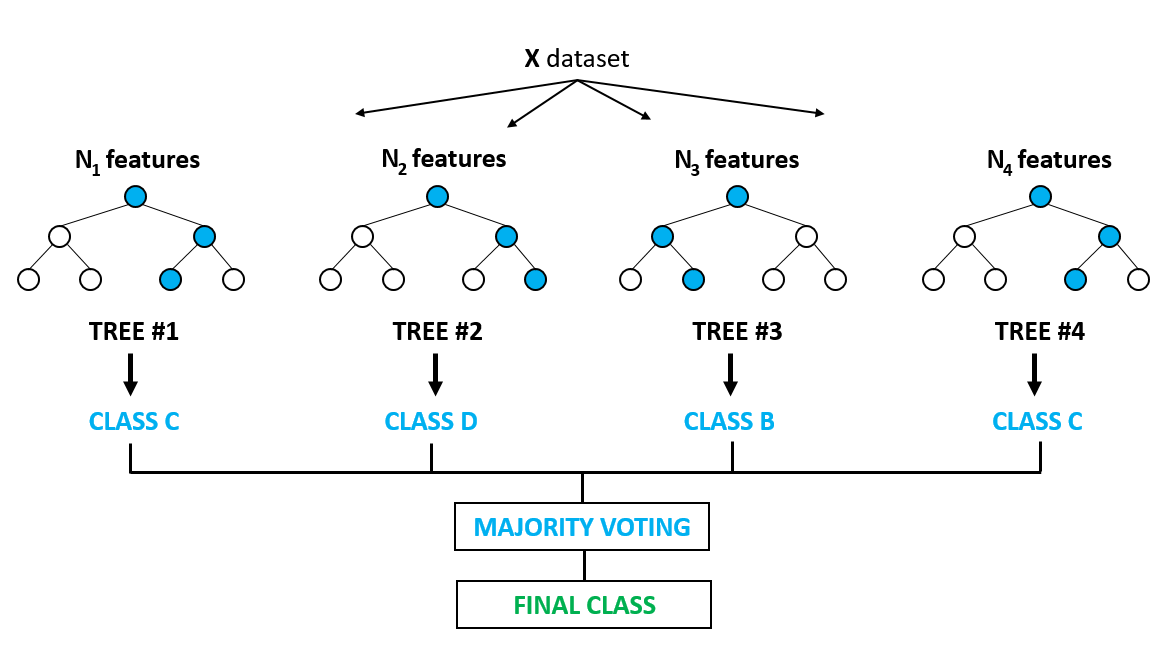</div>

### RF - Model Oluşturma

Fonksiyonumuzu **sklearn.ensemble** altindan **RandomForestRegressor** ile projemize dahil ediyoruz.
* n_estimators : birbirinden farkli olusturulan agaclarin sayisini vermektedir.
* max_depth : her agacin maksumum derinlik seviyesini ifade eder
* min_sample_split : bir node bolunmeden once bu nodedaki gozlem sayisini ifade ediyor
* max_features : bolunme islemlerinde goz onunde bulundurulacak olan maksimum degisken sayisini ifade ediyor 
* min_samples_leaf : leaf nodedaki minimum gozlem sayisini ifade ediyor
* rf'da daha onemli olan uc parametre vardir; *n_estimators* - *max_features* - max_depth

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=99).fit(X_train,y_train)

In [56]:
print("Ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,rf_model.predict(X_test))))

Ilkel Test Hatasi:	 335.41925391890254


#### RF - Model Tuning

RF'da teorik olarak uzerinde bulundugu verisetlerinde iyi calistigina inanilan iki adet **n_estimators** yani agac sayisi degeri bulunmaktadir. Bunlar **500 ve 1000** sayisidir. Fakat [200,500,1000,2000] degerlerini denemek daha yararli olacaktir.

**Random Forest icerisinde verdigimiz parametre kadar alt agac bulunmaktadir. Ayrica parametreler icin verdigimiz her bir degerin kombinasyonu kadar deneme yapilacagi ve bunun da 10 katli olarak gerceklestirilecegi icin islem yuku bir hayli fazladir. **
* Buna cozum olarak modelin kurulma suresini dusurmek icin es zamanli yapilacak islemleri de devreye alir ve islemciyi tam kapasitede kullanilir.
    * Bunu gerceklestirmek icin GridSearchCV fonksiyonuna parametre olarak **n_jobs = -1** verilir.


In [57]:
rf_params = {"max_depth" : list(range(1,10)),
            "max_features" : [3,5,10,15],
            "n_estimators" : [200,500,1000,2000]}

In [58]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1).fit(X_train,y_train)

In [59]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 3, 'n_estimators': 200}

In [61]:
print("Validasyon Sonrasi Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,rf_cv_model.predict(X_test))))

Validasyon Sonrasi Test Hatasi:	 337.79377752389826


Burada ilk kez degiskenlerin onem duzeylerine bir goz atacagiz.

In [64]:
rf_model = RandomForestRegressor(max_depth=7,max_features = 3,n_estimators= 200).fit(X_train,y_train)
Importance = pd.DataFrame({"Importance" : rf_model.feature_importances_*100}, index=X_train.columns)

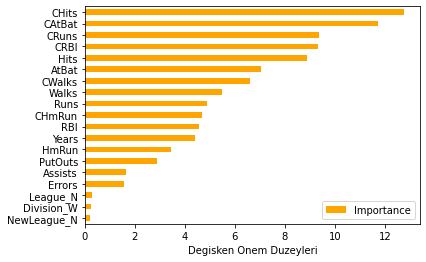

In [65]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="orange")
plt.xlabel("Degisken Onem Duzeyleri");

## **g. Gradient Boosting Machines (GBM)**

AdaBoost'un siniflandirma ve regresyon problemlerine kolayca uyarlanabilen genellestirilmis versiyonudur. Artiklar uzerine tek bir tahminsel model formunda olan modeller serisi kurulur. Bundan sonra ele alacak oldugumuz butun agaca dayali algoritmalarin teorik frameworkudur. Uygun bir cost fonksiyonu uzerine calisan bir optimizasyon algoritmasidir.
* Boosting Yontemlerine Giris:
    * Zayif ogrenicileri bir araya getirip guclu bir ogrenici ortaya cikarmak fikrine dayanir.
    * Adaptive Boosting (AdaBoost)
        * Zayif siniflandiricilarin bir araya gelerek guclu bir siniflandirici olusturmasi fikrini hayata geciren algoritmadir.
        * Zayif ogrenicilerin uygulamasi asagida gorselde siniflandirma problemiyle betimlenmistir.
            * Box 1'de siniflar ikiye ayrilmis. Fakat kirmizi sinif olan nitelendirilen sag tarafta yanlis siniflandirilan bazi degerler bulunmaktadir.
            * Box 2'de yani ikinci iterasyonda yine bir siniflandirma islemi yapilmis. Bir onceki iterasyonda siniflandirmada hata yapilan mavilere agirlik verilmis. Fakat mavi siniflandirmasina koyulmus yine yanlis siniflandirmalar elde edilmis.
            * Box 3'te ise ikinci iterasyonda yanlis siniflandirilan kirmizilara agirlik verilmis. Dogru siniflandirilan degerler ise yuvarlak icine alinarak belirlenen siniflari korunmus.
            * Son iterasyonda ise veri icerisindeki siniflar cok basarili bir sekilde siniflandirilmis.
         * AdaBoostun calisma prensibinde iteratif bir sekilde kumulatif olarak isleme soz konusudur. Yani agaclarin birbirlerine bagimliligi soz konusudur. Bagging isleminde agaclar birbirinden bagimsizdir.
        * <div> 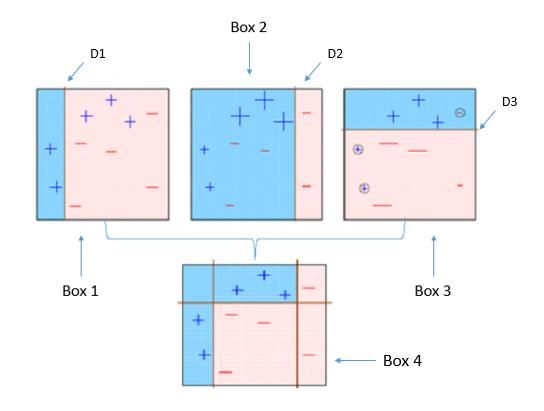</div>
* Gradient Boosting tek bir tahminsel model formunda olan modeller serisi olusturur.
* Seri icerisindeki bir model, serideki bir onceki modelin tahmin artiklarinin/hatalarinin (residuals) uzerine kurularak (fit) olusturulur.
* GBM diferansiyellenebilen herhangi bir kayip fonksiyonunu optimize edebilen *Gradient Descent* algoritmasini kullanmaktadir.
* GB bircok temel ogrenici tipi(base learner type) kullanabilir. (Tree, linear terms, splines, ...)
* Cost fonksiyonlari ve link fonksiyonlari modifiye edilebilirdir.
* Boosting + Gradient Descent olarak da anilabilir.
* <div> 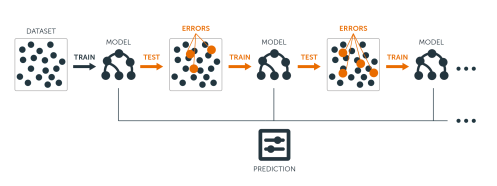</div>

### GBM - Model Oluşturma

Fonksiyonumuzu **sklearn.ensemble** altindan **GradientBoostingRegressor** ile projemize dahil ediyoruz.
* GBM kullanirken, kullandigimiz algoritma hem agaca dayali bir yontem olabilir, hem de linear bir yontem olabilir. Biz agaca dayali olarak kullanacagiz.
* *GBM icin genellikle n_estimators degeri 1k ile baslamali diye dusunulur.*

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [67]:
print("Ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,gbm_model.predict(X_test))))

Ilkel Test Hatasi:	 344.29683983720474


#### GBM - Model Tuning

In [68]:
gbm_params = {
    "learning_rate" : [0.001, 0.01, 0.1, 0.2],
    "max_depth" : [3, 4, 8, 50, 100],
    "n_estimators" : [200, 500, 1000, 2000],
    "subsample" : [1, 0.5, 0.75]
}

In [69]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1973 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  7.1min finished


In [70]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 100,
 'n_estimators': 2000,
 'subsample': 0.5}

In [71]:
gbm_model = GradientBoostingRegressor(learning_rate=0.1,
                                      max_depth = 100,
                                      n_estimators= 2000,
                                     subsample = 0.5).fit(X_train,y_train)
Importance = pd.DataFrame({"Importance" : gbm_model.feature_importances_*100}, index=X_train.columns)

In [1]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="orange")
plt.xlabel("Degisken Onem Duzeyleri");

NameError: name 'Importance' is not defined

## **h. eXtreme Gradient Boosting (XGBoost)**

XGBoost, GBM'in hiz ve tahmin performansini arttirmak uzere optimize edilmis; olceklenebilir ve farkli platformlara entegre edilebilir halidir. *Supheye mi dustun XGBoost kullan biraderim!*
* R, Python, Hadoop, Scala, Julia ile kullanilabilir.
* Olceklenebilirdir.
* Hizlidir.
* Tahmin basarisi yuksektir.
* Bircok kaggle yarismasindan basarisini kanitlamistir.
* 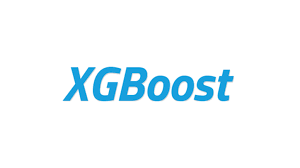

### XGBoost - Model Oluşturma

XGBoost'u kullanabilmek icin oncelikle **!pip install xgboost** seklinde indirme ve kurma islemini gerceklestirmemiz gerekiyor.

In [73]:
!pip install xgboost

XGBoost dokumantasyonlarinda gelistiricisinin soyle bir notu bulunmaktadir;
* *Standart pandas df ya da numpy arraylerini kullanmak yerine XGBoostun kendi veri yapisini kullanirsaniz daha performansli sonuclar elde edebilirsiniz.* seklinde belirtilmistir.
* Bunu gerceklestirmek icin ise
    * XGBoost altindaki **DMatrix** fonksiyonuna **data** parametresine *X_train* degerini, **label** parametresine ise *y_train* degerini vererek veri yapisini olusturmus oluyoruz.
* Fakat bu sart degildir istenirse normal pddf verilerek de islem yapilabilir.

In [77]:
import xgboost as xgb

DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

In [79]:
xgb_model = xgb.XGBRegressor().fit(X_train,y_train)

In [80]:
print("Ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,xgb_model.predict(X_test))))

Ilkel Test Hatasi:	 361.43924861595053


#### XGBoost - Model Tuning

* booster : agaca dayali bir booster oldugunu belirten *gbtree* asagida gorulmektedir.
* *colsample_bytree* : agac basina degiskenlerden alinacak olan ornek orani, optimize edilecek parametredir.
* *learning_rate* : daraltma adim boyu olarak da isimlendiriliyor. overfittingi engellemek icin kullandigimiz degiskenlerden birisidir. 0 ile 1 arasinda deger alir. Cok kucuk olmasi tahmin suresini arttirir fakat basariyi da arttirir.
* *max_depth* : overfittingin onune gecmek icin kullanabildigimiz ve karmasiklik parametresi olarak da adlandirabilecegimiz ciddi etkisi olan bir parametredir.
* *n_estimators* : yine optimize etmemiz gereken degerlerden bir tanesi

In [81]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
xgb_grid = {
    "colsample_bytree" : [0.4,0.5,0.6,0.9,1],
    "n_estimators" : [100,200,500,1000],
    "max_depth" : [2,3,4,5,6],
    "learning_rate" : [0.1,0.01,0.5]
}

In [83]:
xgb = xgb.XGBRegressor()

xgb_cv = GridSearchCV(xgb,
                     param_grid=xgb_grid,
                     cv=10,
                     n_jobs=-1,
                     verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1661 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2189 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.4min finished


In [84]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [87]:
from xgboost import XGBRegressor
xgb_tuned = XGBRegressor(colsample_bytree = 0.4,
                        learning_rate = 0.1,
                        max_depth = 5,
                         n_estimators = 100).fit(X_train,y_train)

In [88]:
print("Validasyon Sonrasi Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,xgb_tuned.predict(X_test))))

Validasyon Sonrasi Test Hatasi:	 337.10172421409334


### Model Tuning Konusunda Hiperparametreler ile Alakali Puf Noktalar

* Gelismis Hiperparametre Optimizasyonunda
    * Oncelikle modelin onemli olarak kullandigi parametreler sirasiyla belirlenir. Orn learning_rate,max_depth
    * Onem sirasi belirlendikten sonra parametrelerin on tanimli degerleri sabit birakilir. Oncelikle en onemli olan parametrenin degerleri uzayda aranir. 
    * Burada learning_rate bulunduktan sonra benzer islemler onem sirasina gore farkli iterasyonlarda bu degerlerin optimize vektorleri bulunur.
    * En son bulunan degerleri carpistirarak genel durumu gozlemleyecek sekilde gelismis hiperparametre optimizasyonu gerceklestirilir.

## **i. LightGBM**

LightGBM, XGBoost'un egitim suresi performansini arttirmaya yonelik Microsoft tarafindan gelistirilen bir GBM turudur. Light ifadesini buradan almaktadir, acik kaynak olarak paylasilmaktadir.
* Daha performanslidir.
* XGBoostta kullanilan *Level-wise* buyume stratejisi yerine *Leaf-wise* buyume stratejisini kullanir.
* Breadth-first Search (BFS) algoritmasi yerine Depth-first Search algoritmasini kullanir.
<br><br>
* Verisetindeki gozlem ve degisken sayisi cok buyuk miktarlarda oldunga C++'ta yazilmis olmasina ragmen XGBoost'un egitim suresi cok uzun surmektedir. XGBoost degiskenleri ayirmak ve farkli bolme noktalarini arastirmak icin karar agaclarini kullanir. Bu isleme Level-wise tree growth denir. LightGBM ise daha iyi fit edebilmek icin splitlere odaklanmaktadir, buna da Leaf-wise tree growth denir.
    * <div> 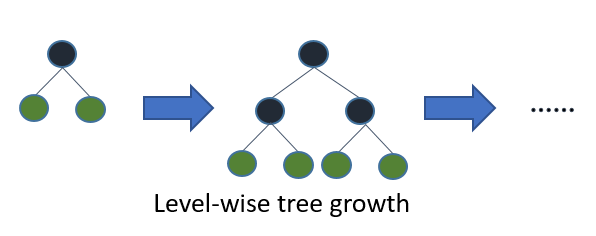</div>
    * <div> 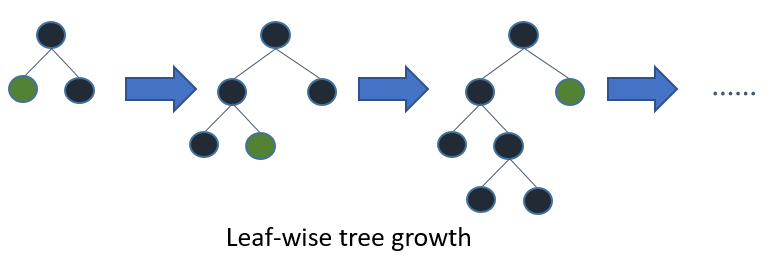</div>
* 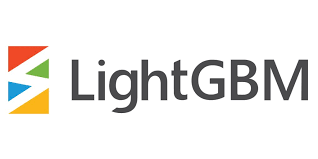

### LightGBM - Model Oluşturma

LightGBM'i kullanabilmek icin oncelikle **!pip install lightgbm** seklinde indirme ve kurma islemini gerceklestirmemiz gerekiyor.

In [89]:
!pip install lightgbm

In [91]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor().fit(X_train,y_train)

Burada diger algoritmalardan farkli olarak predict islemini gerceklestirirken **num_iteration = lgbm_model.best_iteration_** parametresini de veriyoruz.

In [95]:
print("Ilkel Test Hatasi:\t",
      np.sqrt(mean_squared_error(
          y_test,
          lgbm_model.predict(X_test,num_iteration=lgbm_model.best_iteration_))))

Ilkel Test Hatasi:	 357.8594964743422


#### LightGBM - Model Tuning

In [98]:
lgbm_grid = {
    "colsample_bytree" : [0.4,0.5,0.6,0.9,1],
    "n_estimators" : [20,40,100,200,500,1000],
    "max_depth" : [1,2,3,4,5,6,7,8],
    "learning_rate" : [0.1,0.01,0.5,1]
}

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm,lgbm_grid,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 996 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 2620 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 7804 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  1.1min finished


In [99]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000}

In [101]:
lgbm_tuned = LGBMRegressor(colsample_bytree = 0.4,
                        learning_rate = 0.01,
                        max_depth = 2,
                         n_estimators = 1000).fit(X_train,y_train)

In [102]:
print("Validasyon Sonrasi Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,lgbm_tuned.predict(X_test))))

Validasyon Sonrasi Test Hatasi:	 368.62883392227235


## **j. Category Boosting (CatBoost)**

Kategorik degiskenler ile otomatik olarak mucadele edebilen,hizli ve basarili bir diger GBM turevi. Yandex tarafindan '17 yilinda gelistirilmistir.
* Kategorik degisken destegi sunmaktadir. Bunun uzerinde basarilidir.
* Hizli ve olceklenebilir GPU destegi sunmaktadir.
* Daha basarili tahminler sunmaktadir.
* Hizli train ve hizli tahmin
* Rusya'nin ilk acik kaynak kodlu ve basarili olan ML calismasidir.
* 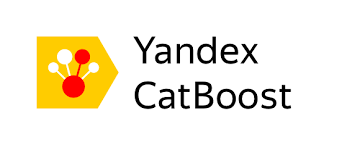

### CatBoost - Model Oluşturma

CatBoost'u kullanabilmek icin oncelikle **!pip install catboost** seklinde indirme ve kurma islemini gerceklestirmemiz gerekiyor.

In [103]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=adc2fad17f51dc2f00ba5a0b7b09e9d1a3c90d2d02efffe74db587121fb1eec5
  Stored in directory: c:\users\ea\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [104]:
from catboost import CatBoostRegressor

catb = CatBoostRegressor()
catb_model = catb.fit(X_train,y_train)

Learning rate set to 0.029229
0:	learn: 407.2324126	total: 143ms	remaining: 2m 22s
1:	learn: 402.7701418	total: 145ms	remaining: 1m 12s
2:	learn: 397.7188095	total: 146ms	remaining: 48.5s
3:	learn: 392.6843620	total: 148ms	remaining: 36.8s
4:	learn: 387.3819200	total: 149ms	remaining: 29.7s
5:	learn: 382.5807569	total: 151ms	remaining: 25s
6:	learn: 378.3096767	total: 153ms	remaining: 21.6s
7:	learn: 373.8818823	total: 154ms	remaining: 19.1s
8:	learn: 369.5484002	total: 156ms	remaining: 17.2s
9:	learn: 365.4223138	total: 158ms	remaining: 15.6s
10:	learn: 360.7366736	total: 159ms	remaining: 14.3s
11:	learn: 357.4540285	total: 161ms	remaining: 13.3s
12:	learn: 353.2092581	total: 163ms	remaining: 12.3s
13:	learn: 349.9331623	total: 164ms	remaining: 11.6s
14:	learn: 346.3768277	total: 168ms	remaining: 11s
15:	learn: 343.0385812	total: 171ms	remaining: 10.5s
16:	learn: 339.0496583	total: 173ms	remaining: 10s
17:	learn: 335.6896830	total: 175ms	remaining: 9.56s
18:	learn: 331.8435397	total: 

In [105]:
print("Ilkel Test Hatasi:\t",
      np.sqrt(mean_squared_error(
          y_test,
          catb_model.predict(X_test))))

Ilkel Test Hatasi:	 314.0717376510417


#### CatBoost - Model Tuning

In [ ]:
catb_grid = {
    "iterations" : [200,500,1000,2000],
    "depth" : [3,4,5,6,7,8],
    "learning_rate" : [0.01,0.03,0.05,0.1]
}

catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb,catb_grid,cv=5, n_jobs=-1, verbose=2).fit(X_train,y_train)

# 45 dk civarinda surecegi icin calistirilmadi.